# Checkpoint 2
Project Name: **Once More! An iterative text revision model**


Robustness and Multilinguality checks for Author's models and those of "Understanding Iterative Revision from Human-Written Text" by Wanyu Du et al.


Team
* Pratish Mashankar G#: G01354094
* William J David G#: G01129185
* Sai Likhitha Allanki G#: G01336091

Git Repo: https://github.com/PratishMashankar/cs678cp1.git

## README
The following code perfroms Multilinguality and Robustness tests on Authors and the Wanyu Du et al's code. The work flow entitles as below:

1. Cloning Git repo
2. Using requirements.txt to download the necessary libraries
3. Robustness Checks for Intent CLassfication and Text Generation
4. Multilinguality Checks for Intent CLassfication and Text Generation

## Processing code

The following code blocks import the required files and datasets from Authors and Wanyu Du et al git repositories. They also install the requirements

Cloning Git Repo

In [ ]:
%cd /content
!apt-get install git-lfs git
!git clone https://github.com/PratishMashankar/cs678-cp1-cp2.git #dont change this
!git clone https://github.com/vipulraheja/iterater.git
!git config --global user.email "sailikhitha22@gmail.com" #change this with your email
!git config --global user.name "Sai Likhitha Allanki" #change this with your name

/content
Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.9.2-1).
git is already the newest version (1:2.25.1-1ubuntu3.11).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Cloning into 'cs678-cp1-cp2'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 73 (delta 34), reused 31 (delta 7), pack-reused 0
Unpacking objects: 100% (73/73), 1.07 MiB | 2.77 MiB/s, done.
Cloning into 'iterater'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 243 (delta 21), reused 40 (delta 12), pack-reused 187
Receiving objects: 100% (243/243), 121.33 MiB | 18.07 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Error downloading object: dataset/IteraTeR_plus.zip (082f3d5): Smudge error: Error downloading 

Downloading Requirements

In [ ]:
# Change 1: Updating the requirements.txt of Wanyu Du et al. to match the latest versions
import re

requirements_path = '/content/iterater/requirements.txt'

# Open the input file
with open(requirements_path, "r") as f:
    # Read the contents of the file and split on newlines
    contents = f.read().splitlines()

# Clean the package names by removing whitespace and version numbers
cleaned = [re.sub(r"\s*\d+\.\d+(\.\d+)*$", "", package) for package in contents]

# Write the cleaned package names to a new file in the desired format
with open(requirements_path, "w") as f:
    f.write("torchvision\n")
    f.write("transformers\n")
    f.write("datasets==1.18.3\n")
    f.write("nltk\n")
    f.write("spacy\n")
    f.write("numpy\n")
    f.write("sentencepiece\n")
    f.write("google\n")
    f.write("protobuf\n")
    f.write("absl-py\n")
    f.write("rouge_score\n")
    f.write("wandb\n")
    f.write("sacrebleu==1.5.1\n")
    f.write("sacremoses\n")

!pip install -r /content/iterater/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 58.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

Unzipping Dataset

In [ ]:
# dataset_path = '/content/iterater/dataset/IteraTeR'
!unzip '/content/iterater/dataset/IteraTeR.zip'

Archive:  /content/iterater/dataset/IteraTeR.zip
   creating: IteraTeR/
   creating: IteraTeR/full_sent_level/
  inflating: __MACOSX/IteraTeR/._full_sent_level  
   creating: IteraTeR/human_sent_level/
  inflating: __MACOSX/IteraTeR/._human_sent_level  
   creating: IteraTeR/full_doc_level/
  inflating: __MACOSX/IteraTeR/._full_doc_level  
   creating: IteraTeR/human_doc_level/
  inflating: __MACOSX/IteraTeR/._human_doc_level  
  inflating: IteraTeR/full_sent_level/test.json  
  inflating: __MACOSX/IteraTeR/full_sent_level/._test.json  
  inflating: IteraTeR/full_sent_level/dev.json  
  inflating: __MACOSX/IteraTeR/full_sent_level/._dev.json  
  inflating: IteraTeR/full_sent_level/train.json  
  inflating: __MACOSX/IteraTeR/full_sent_level/._train.json  
  inflating: IteraTeR/human_sent_level/test.json  
  inflating: __MACOSX/IteraTeR/human_sent_level/._test.json  
  inflating: IteraTeR/human_sent_level/dev.json  
  inflating: __MACOSX/IteraTeR/human_sent_level/._dev.json  
  inflating

## Part 1: Robustness Test

We test the robustness on best models obtained from Checkpoint 1 for the two tasks of Intent Classification and Iterative Edit Generation

### Generating Robustness Data

#### Installs

In [ ]:
!pip install checklist
!jupyter nbextension install --py --sys-prefix checklist.viewer
!jupyter nbextension enable --py --sys-prefix checklist.viewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.4 MB/s eta 0:00:00
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached qtconsole-5.4.3-py3-none-any.whl (121 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import checklist
from checklist.test_suite import TestSuite
from checklist.editor import Editor
from checklist.perturb import Perturb
from google.colab import output
import spacy
import numpy as np

nlp = spacy.load('en_core_web_sm')

output.enable_custom_widget_manager()
editor = Editor()

#### Editor Set up

DATA:

- urls
- misspelling(minimal and catastophic)
- grammar errors
- Taxonomy(simple word changes)
- names with ethnicitys
- mismatching pronouns
  - ie she w/ john
- refrencing different times
  - ie talking in the present then last week
- negation, double negation and triple negation
- refrenceing a noun multiple times with some sort of possesion
- combinations of the above


In [ ]:
data = ['John is a very smart person, he lives in Ireland.',
        'Mark Stewart was born and raised in Chicago',
        'Luke Smith has 3 sisters.',
        'Mary is not a nurse.',
        'Julianne is an engineer.',
        'My brother Andrew used to be a lawyer.']
sample_urls = ["https://colab.research.google.com/drive/1pOVdpSaZSFcjFEW_5nYb0vD62vl6YB7W#scrollTo=nQtrjhZo9S87",
               "https://github.com/marcotcr/checklist",
               "https://nlp.cs.gmu.edu/course/cs678-spring23/project/",
               "https://arxiv.org/pdf/2005.04118v1.pdf",
               "https://chat.openai.com/",
               "https://www.netflix.com/search?q=cyber&jbv=81054853"]

In [ ]:
# Personal pronouns
personal_pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them']

# Possessive pronouns
possessive_pronouns = ['mine', 'yours', 'his', 'hers', 'its', 'ours', 'theirs']

# Reflexive pronouns
reflexive_pronouns = ['myself', 'yourself', 'himself', 'herself', 'itself', 'ourselves', 'yourselves', 'themselves']

# Demonstrative pronouns
demonstrative_pronouns = ['this', 'that', 'these', 'those']
editor.add_lexicon("personal_pronouns", personal_pronouns)
editor.add_lexicon("possessive_pronouns", possessive_pronouns)
editor.add_lexicon("reflexive_pronouns", reflexive_pronouns)
editor.add_lexicon("demonstrative_pronouns", demonstrative_pronouns)

In [ ]:
verbs = ['run', 'eat', 'sleep', 'masticate', 'gargle', 'defenestrate', "runed"]
editor.add_lexicon("verb", verbs)
nouns = ['dog', 'cat', 'car', 'bus', 'book', 'phone', 'quagmire', 'mellifluousness', 'gobbledygook']
editor.add_lexicon("noun", nouns)
not_ = [" not", ""]
editor.add_lexicon("not", not_)
editor.add_lexicon("url", sample_urls)
editor.add_lexicon("adj", ["happy", "stupid", "serendipitous", "ebullient", "execrable", "strong"])

In [ ]:
urls = ["I've linked this {adj} website, {url}, to {first_name}'s resume",
        "This link {url}, is really {adj1} as well its {adj2}"]
grammar = ["{personal_pronouns} was {verb} with {mask} {mask}.",
           "{noun}, was {mask} {verb} upsidedown {personal_pronouns}"]
names = ["{first_name1} and {first_name2} met {first_name3} at {city}, but {personal_pronouns1} couldn't stay long because {personal_pronouns2} had to meet up with {personal_pronouns3} friend. Later, they all went to {first_name2}'s house for dinner, and {personal_pronouns2} {verb} {personal_pronouns3} a {verb} meal while {personal_pronouns1} {verb}.",
         "{first_name1} is from {country1}, {first_name2} is from {country2}, {personal_pronouns1} doesnt know {personal_pronouns2}"]
temporal = ["After {personal_pronouns} finish this task tomorrow, {personal_pronouns} will have already submitted it yesterday, but {personal_pronouns} need to revise it next week before the deadline that was two days ago."]
nega = ["I love{not1}{not2}{not3}{not4}{not5}{not6} going to {country}",
        "please do{not1}{not2}{not3}{not4} {verb}"]
pos = ["{first_name1} owns ten cars {personal_pronouns} loves them {personal_pronouns} cheerishes them {personal_pronouns} hates them and {personal_pronouns} always washes them"]
#print(list(editor.lexicons.keys()))

#### Data Generation

In [ ]:
url_data = editor.template(urls, remove_duplicates=True)
grammar_data = editor.template(grammar, remove_duplicates=True)
names_data = editor.template(names,nsamples =200000 ,remove_duplicates=True)
tempor_data = editor.template(temporal, remove_duplicates=True)
nega_data = editor.template(nega)
pos_data = editor.template(pos, remove_duplicates=True, meta = True, save=True)

/usr/local/lib/python3.10/dist-packages/checklist/text_generation.py:171: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  to_pred = torch.tensor(to_pred, device=self.device).to(torch.int64)


In [ ]:
# change the size values for different distributions of the data
pos_points = np.random.choice(len(pos_data.data), size= 5, replace=False, )
url_points = np.random.choice(len(url_data.data), size= 6, replace=False, )
grammar_points = np.random.choice(len(grammar_data.data), size= 6, replace=False, )
names_points = np.random.choice(len(names_data.data), size= 5, replace=False, )
tempor_points = np.random.choice(len(tempor_data.data), size= 5, replace=False, )
nega_points = np.random.choice(len(nega_data.data), size= 5, replace=False, )

In [ ]:
import torch
misspelling = []

for i in range(1,50):
  temp = Perturb.perturb(data, Perturb.add_typos, typos=i).data
  for x in temp:
    misspelling.append(x[1])

#print(misspelling[0])
mis_points = np.random.choice(len(misspelling), size=5, replace=False)
points = (url_points, grammar_points, names_points, tempor_points, nega_points, pos_points, mis_points)
data_built = (url_data, grammar_data, names_data, tempor_data, nega_data, pos_data, misspelling)

#### Making the JSON

In [ ]:
labels = ['clarity', 'fluency', 'coherence', 'style', 'meaning-changed']

In [ ]:
final_data = []
labelcnt = -1
for d in data:
  labelcnt+=1
  final_data.append({"before_sent" : d,
                     "after_sent" : d,
                    "before_sent_with_intent": "<"+ labels[labelcnt%len(labels)] +"> "+ d,
                    "labels": labels[labelcnt%len(labels)],
                    "doc_id":'0',
                    "revision_depth": "3"})
for point in range(len(points)):
  for p in points[point]:
    labelcnt +=1
    #print(data_built[point].data[p])
    #final_data.append(data_built[point].data[p][0])
    try:
      try:
        final_data.append({"before_sent" : data_built[point].data[p][0],
                           "after_sent" : data_built[point].data[p][0],
                           "before_sent_with_intent": "<"+ labels[labelcnt%len(labels)] +"> "+ data_built[point].data[p][0],
                           "labels": labels[labelcnt%len(labels)],
                           "doc_id":'0',
                           "revision_depth": "3"})
      except:
        final_data.append({"before_sent" : data_built[point][p],
                          "after_sent" : data_built[point][p],
                          "before_sent_with_intent": "<"+ labels[labelcnt%len(labels)] +"> "+ data_built[point][p],
                          "labels": labels[labelcnt%len(labels)],
                          "doc_id":'0',
                          "revision_depth": "3"})
        continue
      labelcnt +=1
      final_data.append({"before_sent" : data_built[point].data[p][1],
                         "after_sent" : data_built[point].data[p][1],
                           "before_sent_with_intent": "<"+ labels[labelcnt%len(labels)] +"> "+ data_built[point].data[p][1],
                           "labels": labels[labelcnt%len(labels)],
                           "doc_id":'0',
                           "revision_depth": "3"})
    except:
      #print(data_built[point].data[0][0])
      final_data.append({"before_sent" : data_built[point].data[0][0],
                         "after_sent" : data_built[point].data[0][0],
                           "before_sent_with_intent": "<"+ labels[labelcnt%len(labels)] +"> "+ data_built[point].data[0][0],
                           "labels": labels[labelcnt%len(labels)],
                           "doc_id":'0',
                           "revision_depth": "3"})
      continue

In [ ]:
import json
#j = json.dumps(final_data)
#print(j[0])
with open("robust_test.json", "w") as outfile:
  j = json.dumps(final_data)
  for i in final_data:
    j = json.dumps(i)
    #print(j)
    outfile.write(j + "\n")

Do these two commands if you want to generate a new test set for robustness testing

In [ ]:
#!rm /content/cs678-cp1-cp2/robust_data/test.json

In [ ]:
#!mv /content/robust_test.json /content/cs678-cp1-cp2/robust_data/test.json

#### Pertubing exitsing data

In [ ]:
#temp = Perturb.perturb(data, Perturb.add_typos, typos=i).data
%cd /content/

file = '/content/IteraTeR/human_sent_level/test.json'
nlp = spacy.load('en_core_web_sm')
c = 0

with open(file) as f:
  json_data = json.loads('[' + f.read().replace('}\n{', '},\n{') + ']')

for x in range(len(json_data)):
  #print(before_sent)
  before_sent = json_data[x]['before_sent']
  after_sent = json_data[x]['after_sent']

  if isinstance(before_sent, list):
      before_sent = ' '.join(filter(None, before_sent))

  if before_sent is None:
    continue
  #print(before_sent)
  if c%5 == 0:
    before_sent = Perturb.add_typos(before_sent, 50)
    after_sent = Perturb.add_typos(after_sent, 50)
  elif c%5 == 1:
    try:
      before_sent = Perturb.perturb(list(nlp.pipe([before_sent])),  Perturb.add_negation).data[0][0]
      after_sent = Perturb.perturb(list(nlp.pipe([after_sent])),  Perturb.add_negation).data[0][0]
    except:
      try:
        before_sent = Perturb.add_typos(before_sent, 100)
        after_sent = Perturb.add_typos(after_sent, 100)
      except:
        before_sent = Perturb.contract(before_sent)
        after_sent = Perturb.contract(after_sent)
  elif c%5 == 2:
    before_sent = Perturb.contract(before_sent)
    after_sent = Perturb.contract(after_sent)
  elif c%5 == 3:
    before_sent = Perturb.expand_contractions(before_sent)
    after_sent = Perturb.expand_contractions(after_sent)
  elif c%5 == 4:
    before_sent = Perturb.perturb(list(nlp.pipe([after_sent])), Perturb.punctuation).data[0][0]
    after_sent = Perturb.perturb(list(nlp.pipe([after_sent])), Perturb.punctuation).data[0][0]


  json_data[x]['before_sent'] = before_sent

  json_data[x]['before_sent_with_intent'] = "<" + json_data[x]['labels'] + ">  " + before_sent

  json_data[x]['after_sent'] = after_sent
  c+=1

with open('test_pertub_robust.json', 'w') as f:
  j = json.dumps(json_data)
  for i in json_data:
    j = json.dumps(i)
    #print(j)
    f.write(j + "\n")


/content


In [ ]:
!cp -r /content/cs678-cp1-cp2/robust_data /content/cs678-cp1-cp2/robust2_data
!rm /content/cs678-cp1-cp2/robust2_data/test.json
!mv /content/test_pertub_robust.json /content/cs678-cp1-cp2/robust2_data/test.json

In [ ]:
%cd /content/cs678-cp1-cp2/robust2_data/

/content/cs678-cp1-cp2/robust2_data


### Task 1.1: Robustness Test on Intent Classfication Model - RoBERTa 10 epochs

In [ ]:
%%time
!python 'train_intent_classifier.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 10  -s roberta-large-ten -d /content/cs678-cp1-cp2/robust2_data

2023-05-09 01:52:20.598664: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration robust2_data-11869534e8520c46
100% 3/3 [00:00<00:00, 10932.16it/s]
100% 3/3 [00:00<00:00, 1798.33it/s]
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/robust2_data-11869534e8520c46/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.
100% 3/3 [00:00<00:00, 866.00it/s]
[1258, 739, 311, 100, 807]
[157, 115, 46, 13, 54]
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weight

In [ ]:
%%time
!python 'train_intent_classifier.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 10  -s roberta-large-ten -d /content/cs678-cp1-cp2/robust_data

2023-05-08 18:22:05.497026: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration robust_data-70aec4dfca20afa6
100% 3/3 [00:00<00:00, 11057.04it/s]
100% 3/3 [00:00<00:00, 1708.94it/s]
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/robust_data-70aec4dfca20afa6/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.
100% 3/3 [00:00<00:00, 847.96it/s]
[1258, 739, 311, 100, 807]
[157, 115, 46, 13, 54]
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weights 

### Task 1.2: Robustness Test on Iterative Edit Generation Model - PEGASUS

In [ ]:
#training model
%%time
!mv /content/cs678-cp1-cp2/cp1files/train_sent_pegasus.sh /content/iterater/code/IteraTeR_ACL2022/model/generation
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation

!sh train_sent_pegasus.sh

mv: cannot stat '/content/cs678-cp1-cp2/cp1files/train_sent_pegasus.sh': No such file or directory
/content/iterater/code/IteraTeR_ACL2022/model/generation
+ export TOKENIZERS_PARALLELISM=false
+ PYTHON=python3
+ git clone https://github.com/huggingface/transformers
fatal: destination path 'transformers' already exists and is not an empty directory.
+ cp run_summarization.py ./transformers/examples/pytorch/summarization/
+ TRAIN_SCRIPT=./transformers/examples/pytorch/summarization/run_summarization.py
+ TRAIN=/content/IteraTeR/human_sent_level/train.json
+ VALID=/content/IteraTeR/human_sent_level/dev.json
+ OUTPUT=pegasus_sent_model/
+ sha1sum ./transformers/examples/pytorch/summarization/run_summarization.py
1a98b8a4f2cf13523ec0e86d2094d61c4c53c7c1  ./transformers/examples/pytorch/summarization/run_summarization.py
+ python3 ./transformers/examples/pytorch/summarization/run_summarization.py --model_name_or_path google/pegasus-large --do_train --do_eval --train_file /content/IteraTeR/h

In [ ]:
#printing metrics
%%time
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation
!python3 pegasus_inference_and_metrics.py --checkpoint pegasus_sent_model --reference /content/cs678-cp1-cp2/robust_data/test.json --output pegasus_robust_sent_output

/content/iterater/code/IteraTeR_ACL2022/model/generation
2023-05-08 19:58:09.978012: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  0% 0/75 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (256) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100% 75/75 [02:19<00:00,  1.86s/it]
100% 75/75 [00:00<00:00, 111.90it/s]
100% 75/75 [00:00<00:00, 137.06it/s]
BLEU     : 0.4750746495792065
ROUGE     : {'rouge1': 85.45857360685321, 'rouge2': 81.92106112253073, 'rougeL': 85.53522946206498, 'rougeLsum': 85.53945484980423}
SARI: 30.985572971521584, KEEP: 0.9295671891456474, ADD: 0.0, DELETE: 0.0
CPU times: user 868 ms, sys: 176 ms, total: 1.04 s
Wall time: 2min 44s


## Part 2: Multilinguality Test

We translate the data and creat new train, test and dev files. We use 5 languages-


1. **English** (Germanic branch of the Indo European language family)
2. **French** (Romance branch of the Indo European language family)
3. **Mandarin** (Sinitic branch of the Sino-Tibetan language family)
4. **Hindi** (Indo-Aryan branch of the Indo-European language family)
5. **Tamil** (Dravidian language family)

We compare and contrast new models apart from Wanyu D et el. for both the tasks. For
1. Intent Classifcation, we use:
  1.  **RoBERTa** (Robustly Optimized BERT Approach)
  2. **XLMRoBERTa** (Cross-lingual Language Model)
2. Iterative Edit Generation, we use:
  1.  **PEGASUS** (Pre-training with Extracted Gap-sentences for Abstractive Summarization)
  2. **UNICORN** (UNIfied Crosslingual RepresentatiON)

For both the tasks, namely Intent Classifcation and Iterative Edit Generation, we try
1. **Zero Shot** (by training on baseline English models of Wanyu D et el) and
2. **Fully Supervised Training**

### Translating into English, French, Mandarin, Hindi and Tamil

Install Google Translate

In [ ]:
# Install the translate library
!pip install translate
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17413 sha256=320caf64641f7dd19dc9ecaf35a0a1217333d003cab0a625cb6b897c5ce0763e
  Stored in directory: /root/.cache/pi

Define Translate Function

In [ ]:
%%time

import requests
import json
import re

class Translator:
    def __init__(self):
        self.endpoint = "https://translate.googleapis.com/translate_a/single"

    def translate(self, text, dest="en"):
        params = {
            "client": "gtx",
            "sl": "auto",
            "tl": dest,
            "dt": "t",
            "q": text,
        }
        response = requests.get(self.endpoint, params=params)
        try:
            result = json.loads(response.content.decode("utf-8"))
            if result and result[0] and result[0][0]:
                return result[0][0][0]
            else:
                print(f"Translation failed for the record due to empty text: {text}")
                return text
        except (json.JSONDecodeError, IndexError):
            print(f"Translation failed for {text}")
            return text

CPU times: user 104 ms, sys: 12.3 ms, total: 116 ms
Wall time: 309 ms


Begin Translation

In [ ]:
# create a Translator object
translator = Translator()

# define the JSON files to loop over
files = ['/content/train_data.json',
         '/content/IteraTeR/human_sent_level/test.json',
         '/content/IteraTeR/human_sent_level/dev.json']

# define the target languages to loop over
target_languages = ['fr', 'zh-cn', 'hi', 'ta']

# loop over the target languages
for target_language in target_languages:
    # loop over the JSON files
    for file in files:
        # read the input data from the JSON file
        with open(file) as f:
            json_data = json.loads('[' + f.read().replace('}\n{', '},\n{') + ']')

        # translate the text in the 'before_sent' and 'after_sent' fields and update the dictionary
        for item in json_data:
            before_sent = item['before_sent']
            if isinstance(before_sent, list):
                before_sent = ' '.join(filter(None, before_sent))
            item['before_sent'] = translator.translate(before_sent, dest=target_language)

            item['before_sent_with_intent'] = "<" + item['labels'] + ">  " + item['before_sent']

            after_sent = item['after_sent']
            item['after_sent'] = translator.translate(after_sent, dest=target_language)

        # write the output data to a new JSON file
        with open(target_language + '_' + file.split('/')[-1], 'w') as f:
            for item in json_data:
                json.dump(item, f, ensure_ascii=False, indent=4)
                f.write('\n')

Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translation failed for the record due to empty text:  
Translatio

Update the new train, dev and test files

In [ ]:
import json

# Define the input file names
train_files = [
    'fr_train_data.json',
    'zh-cn_train_data.json',
    'hi_train_data.json',
    'ta_train_data.json'
]

dev_files = [
    'fr_dev.json',
    'zh-cn_dev.json',
    'hi_dev.json',
    'ta_dev.json'
]

# Combine the data from all the input files into a single list for train
train_data = []
for file_name in train_files:
    with open(file_name) as f:
        # file_data = json.load(f)
        file_data = json.loads('[' + f.read().replace('}\n{', '},\n{') + ']')
        train_data.extend(file_data)

# Write the combined data to a new file
with open('train.json', 'w') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=4)


# Combine the data from all the input files into a single list for dev
dev_data = []
for file_name in dev_files:
    with open(file_name) as f:
        # file_data = json.load(f)
        file_data = json.loads('[' + f.read().replace('}\n{', '},\n{') + ']')
        dev_data.extend(file_data)

# Write the combined data to a new file
with open('dev.json', 'w') as f:
    json.dump(dev_data, f, ensure_ascii=False, indent=4)


# Define the input file names
input_files = [
    'fr_test.json',
    'zh-cn_test.json',
    'hi_test.json',
    'ta_test.json'
]

# Combine the data from all the input files into a single list
test_data = []
for file_name in input_files:
    with open(file_name) as f:
        # file_data = json.load(f)
        file_data = json.loads('[' + f.read().replace('}\n{', '},\n{') + ']')
        test_data.extend(file_data)

# Write the combined data to a new file
with open('test.json', 'w') as f:
    json.dump(test_data, f, ensure_ascii=False, indent=4)

### Task 2.1: Intent CLassification

#### Model 2.1.1 RoBERTA 10 Epochs

##### Zero Shot

train: english human_sent_level>train.json

dev: english human_sent_level>dev.json

test: multilingual human_sent_level>test.json

In [ ]:
%%time
# # change directory to intent_classification model
%cd /content/iterater/code/IteraTeR_ACL2022/model/intent_classification

!python 'train_intent_classifier.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 10  -s roberta-large-ten -d '/content/cs678-cp1-cp2/multi_data/zeroshot_multi'

2023-05-06 23:09:44.497100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration roberta_zeroshot-f0c4299871aa2fbc
Reusing dataset json (/root/.cache/huggingface/datasets/json/roberta_zeroshot-f0c4299871aa2fbc/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
100% 3/3 [00:00<00:00, 558.87it/s]
[1258, 739, 311, 100, 807]
[157, 115, 46, 13, 54]
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head

##### Fully Supervised

train: multilingual human_sent_level>train.json

dev: multilingual human_sent_level>dev.json

test: multilingual human_sent_level>test.json

In [ ]:
%%time
!python 'train_intent_classifier.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 10  -s roberta-large-ten -d '/content/cs678-cp1-cp2/multi_data/fully_multi'

`WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementatio

#### Model 2.1.2 XLM-RoBERTa 5 epochs

##### Zero Shot

train: english human_sent_level>train.json

dev: english human_sent_level>dev.json

test: multilingual human_sent_level>test.json

In [ ]:
%%time
%cd /content/iterater/code/IteraTeR_ACL2022/model/intent_classification

!python 'xlmroberta_train_intent_classifier.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 5  -s xlmroberta-large-ten -d '/content/cs678-cp1-cp2/multi_data/zeroshot_multi'

/content/iterater/code/IteraTeR_ACL2022/model/intent_classification
2023-05-06 23:14:59.782132: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration zeroshot_multi-f2a30da9140d8237
100% 3/3 [00:00<00:00, 11439.01it/s]
100% 3/3 [00:00<00:00, 1917.25it/s]
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/zeroshot_multi-f2a30da9140d8237/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.
100% 3/3 [00:00<00:00, 487.90it/s]
[1258, 739, 311, 100, 807]
[157, 115, 46, 13, 54]
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation str

##### Fully Supervised

train: multilingual human_sent_level>train.json

dev: multilingual human_sent_level>dev.json

test: multilingual human_sent_level>test.json

In [ ]:
%%time
!python '/content/cs678-cp1-cp2/intent_classification/xlmroberta_train_intent_classifier.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 5  -s mass-large-ten -d '/content/cs678-cp1-cp2/multi_data/fully_multi'

s2023-05-02 21:08:15.348436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration xlmroberta_data-dd1f94c45d371e0d
100% 3/3 [00:00<00:00, 11346.18it/s]
100% 3/3 [00:00<00:00, 1451.82it/s]
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/xlmroberta_data-dd1f94c45d371e0d/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.
100% 3/3 [00:00<00:00, 411.17it/s]
[1960, 908, 364, 108, 1400]
[628, 460, 184, 52, 216]
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight',

### Task 2.2: Iterative Text Generation

#### Model 2.2.1 pegasus

##### Zero Shot

train: english human_sent_level>train.json

dev: english human_sent_level>dev.json

test: multilingual human_sent_level>test.json

In [ ]:
#training model
%%time
!mv /content/cs678-cp1-cp2/edit_generation/multilingual/pegasus_zeroshot_multilingual_train.sh /content/iterater/code/IteraTeR_ACL2022/model/generation
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation
!sh pegasus_zeroshot_multilingual_train.sh

mv: cannot stat '/content/cs678-cp1-cp2/edit_generation/multilingual/pegasus_zeroshot_multilingual_train.sh': No such file or directory
/content/iterater/code/IteraTeR_ACL2022/model/generation
+ export TOKENIZERS_PARALLELISM=false
+ PYTHON=/usr/local/bin/python
+ git clone https://github.com/huggingface/transformers
fatal: destination path 'transformers' already exists and is not an empty directory.
+ cp run_summarization.py ./transformers/examples/pytorch/summarization/
+ TRAIN_SCRIPT=./transformers/examples/pytorch/summarization/run_summarization.py
+ TRAIN=/content/cs678-cp1-cp2/multi_data/zeroshot_multi/train.json
+ VALID=/content/cs678-cp1-cp2/multi_data/zeroshot_multi/dev.json
+ OUTPUT=pegasus_model_zero/
+ sha1sum ./transformers/examples/pytorch/summarization/run_summarization.py
1a98b8a4f2cf13523ec0e86d2094d61c4c53c7c1  ./transformers/examples/pytorch/summarization/run_summarization.py
+ /usr/local/bin/python ./transformers/examples/pytorch/summarization/run_summarization.py --

In [ ]:
#printing metrics
%%time
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation
!python3 pegasus_inference_and_metrics.py --checkpoint pegasus_model_zero --reference /content/cs678-cp1-cp2/multi_data/zeroshot_multi/test.json --output pegasus_zeroshot_sent_output

/content/iterater/code/IteraTeR_ACL2022/model/generation
2023-05-08 20:39:04.407354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  0% 0/1440 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (256) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100% 1440/1440 [48:56<00:00,  2.04s/it]
100% 1440/1440 [00:12<00:00, 119.88it/s]
100% 1440/1440 [00:12<00:00, 116.68it/s]
BLEU     : 0.2479653899851835
ROUGE     : {'rouge1': 27.861634981263272, 'rouge2': 20.146005398667764, 'rougeL': 27.670150102962648, 'rougeLsum': 27.62254995601035}
SARI: 18.07523499839495, KEEP: 0.2663301166325079, ADD: 0.00047193938440071714, DELETE: 0.2754549939349396
CPU times: user 17.1 s, sys: 3.65 s, total: 

##### Fully Supervised Training

train: multilingual human_sent_level>train.json

dev: multilingual human_sent_level>dev.json

test: multilingual human_sent_level>test.json

In [ ]:
# #training model
# %%time
!mv /content/cs678-cp1-cp2/edit_generation/multilingual/pegasus_fullysup_multilingual_train.sh /content/iterater/code/IteraTeR_ACL2022/model/generation
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation
!sh pegasus_fullysup_multilingual_train.sh

"""with open("/content/output-fully-multilingual-pegasus-10epochs.txt", "r") as file:
    contents = file.read()
    print(contents)"""


mv: cannot stat '/content/cs678-cp1-cp2/edit_generation/multilingual/pegasus_fullysup_multilingual_train.sh': No such file or directory
/content/iterater/code/IteraTeR_ACL2022/model/generation
+ export TOKENIZERS_PARALLELISM=false
+ PYTHON=/usr/local/bin/python
+ git clone https://github.com/huggingface/transformers
fatal: destination path 'transformers' already exists and is not an empty directory.
+ cp run_summarization.py ./transformers/examples/pytorch/summarization/
+ TRAIN_SCRIPT=./transformers/examples/pytorch/summarization/run_summarization.py
+ TRAIN=/content/cs678-cp1-cp2/multi_data/fully_multi/train.json
+ VALID=/content/cs678-cp1-cp2/multi_data/fully_multi/dev.json
+ OUTPUT=pegasus_model_full/
+ sha1sum ./transformers/examples/pytorch/summarization/run_summarization.py
1a98b8a4f2cf13523ec0e86d2094d61c4c53c7c1  ./transformers/examples/pytorch/summarization/run_summarization.py
+ /usr/local/bin/python ./transformers/examples/pytorch/summarization/run_summarization.py --model_

'with open("/content/output-fully-multilingual-pegasus-10epochs.txt", "r") as file:\n    contents = file.read()\n    print(contents)'

In [ ]:
#printing metrics
%%time
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation
!python3 pegasus_inference_and_metrics.py --checkpoint pegasus_model_full --reference /content/cs678-cp1-cp2/multi_data/fully_multi/test.json --output pegasus_sent_output_full

[Errno 2] No such file or directory: '/content/iterater/code/model/generation'
/content/iterater/code/IteraTeR_ACL2022/model/generation
2023-05-08 22:56:38.339947: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  0% 0/1440 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (256) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100% 1440/1440 [37:57<00:00,  1.58s/it]
100% 1440/1440 [00:11<00:00, 125.40it/s]
100% 1440/1440 [00:12<00:00, 116.61it/s]
BLEU     : 0.24154555775384126
ROUGE     : {'rouge1': 27.80156463913007, 'rouge2': 19.961063631651243, 'rougeL': 27.46477192821768, 'rougeLsum': 27.5146708714897}
SARI: 18.079465281471837, KEEP: 0.26554936817718044, ADD: 0.00043437928824

#### Model 2.2.2 mT5

##### Zero Shot

train: english human_sent_level>train.json

dev: english human_sent_level>dev.json

test: multilingual human_sent_level>test.json

In [ ]:
#training model
%%time
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation
!sh mT5_zeroshot_multilingual_train.sh

/content/iterater/code/IteraTeR_ACL2022/model/generation
+ export TOKENIZERS_PARALLELISM=false
+ PYTHON=python3
+ git clone https://github.com/huggingface/transformers
fatal: destination path 'transformers' already exists and is not an empty directory.
+ cp run_summarization.py ./transformers/examples/pytorch/summarization/
+ TRAIN_SCRIPT=./transformers/examples/pytorch/summarization/run_summarization.py
+ TRAIN=/content/iterater/dataset/IteraTeR/human_sent_level/train.json
+ VALID=/content/iterater/dataset/IteraTeR/human_sent_level/dev.json
+ OUTPUT=mT5_model/
+ sha1sum ./transformers/examples/pytorch/summarization/run_summarization.py
1a98b8a4f2cf13523ec0e86d2094d61c4c53c7c1  ./transformers/examples/pytorch/summarization/run_summarization.py
+ python3 ./transformers/examples/pytorch/summarization/run_summarization.py --model_name_or_path google/mt5-base --do_train --do_eval --train_file /content/iterater/dataset/IteraTeR/human_sent_level/train.json --validation_file /content/iterater

In [ ]:
#printing metrics
%%time
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation
!python3 mT5_inference_and_metrics.py --checkpoint mT5_model --reference /content/cs678-cp1-cp2/multi_data/zeroshot_multi/test.json --output mt5_zeroshot_sent_output

/content/iterater/code/IteraTeR_ACL2022/model/generation
2023-05-07 02:54:03.225859: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-07 02:54:03.286307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 02:54:04.377949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  0% 0/1440 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This 

##### Fully Supervised Training

train: multilingual human_sent_level>train.json

dev: multilingual human_sent_level>dev.json

test: multilingual human_sent_level>test.json

In [ ]:
#training model
%%time
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation
!sh mT5_fullysup_multilingual_train.sh

/content/iterater/code/IteraTeR_ACL2022/model/generation
+ export TOKENIZERS_PARALLELISM=false
+ PYTHON=python3
+ git clone https://github.com/huggingface/transformers
fatal: destination path 'transformers' already exists and is not an empty directory.
+ cp run_summarization.py ./transformers/examples/pytorch/summarization/
+ TRAIN_SCRIPT=./transformers/examples/pytorch/summarization/run_summarization.py
+ TRAIN=/content/cs678-cp1-cp2/multi_data/fully_multi/train.json
+ VALID=/content/cs678-cp1-cp2/multi_data/fully_multi/dev.json
+ OUTPUT=mT5_model_full/
+ sha1sum ./transformers/examples/pytorch/summarization/run_summarization.py
1a98b8a4f2cf13523ec0e86d2094d61c4c53c7c1  ./transformers/examples/pytorch/summarization/run_summarization.py
+ python3 ./transformers/examples/pytorch/summarization/run_summarization.py --model_name_or_path google/mt5-base --do_train --do_eval --train_file /content/cs678-cp1-cp2/multi_data/fully_multi/train.json --validation_file /content/cs678-cp1-cp2/multi_d

In [ ]:
#printing metrics
%%time
%cd /content/iterater/code/IteraTeR_ACL2022/model/generation
!python3 mT5_inference_and_metrics.py --checkpoint mT5_model_full --reference /content/cs678-cp1-cp2/multi_data/fully_multi/test.json --output mt5full_sent_output

[Errno 2] No such file or directory: '/content/iterater/code/model/generation'
/content/iterater/code/IteraTeR_ACL2022/model/generation
2023-05-07 03:54:04.387317: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-07 03:54:04.444749: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 03:54:06.013445: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  0% 0/1440 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWar

## Result Graphs

### Multilingual Intent Classification Result

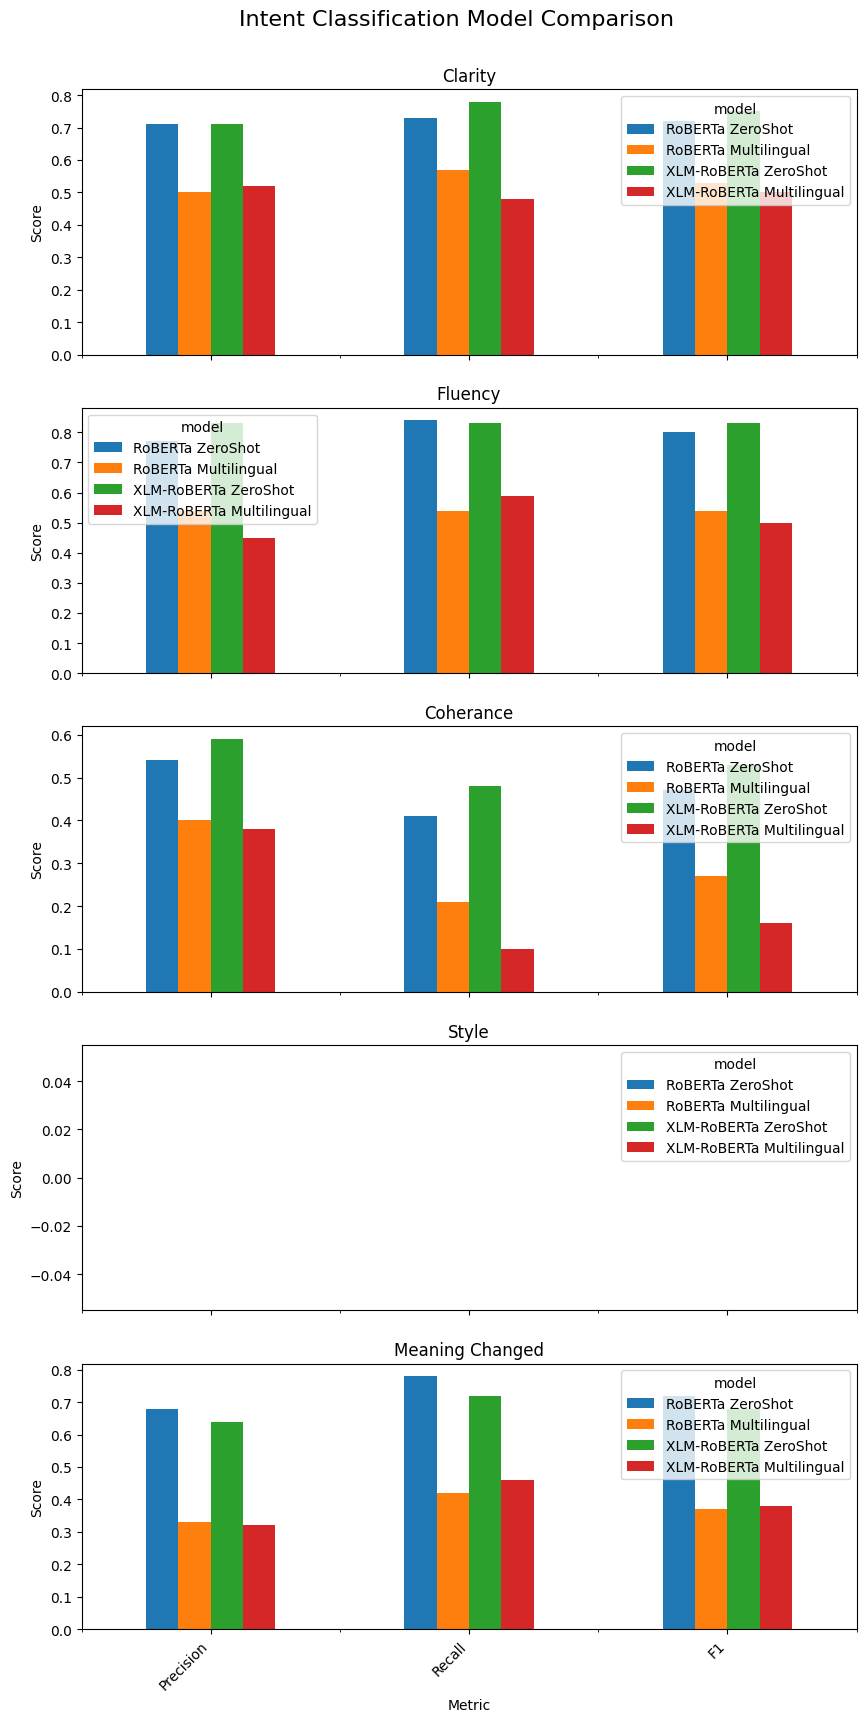

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data for each model's performance
model_data = [
    {
        'model': 'RoBERTa ZeroShot',
        'Clarity': [0.71, 0.73, 0.72],
        'Fluency': [0.77, 0.84, 0.80],
        'Coherance': [0.54, 0.41, 0.47],
        'Style': [0, 0, 0],
        'Meaning Changed': [0.68, 0.78, 0.72],
        'Metric': ['Precision','Recall','F1']
    },
    {
        'model': 'RoBERTa Multilingual',
        'Clarity': [0.50, 0.57, 0.53],
        'Fluency': [0.54, 0.54, 0.54],
        'Coherance': [0.40, 0.21, 0.27],
        'Style': [0, 0, 0],
        'Meaning Changed': [0.33, 0.42, 0.37],
        'Metric': ['Precision','Recall','F1']
    },
    {
        'model': 'XLM-RoBERTa ZeroShot',
        'Clarity': [0.71, 0.78, 0.75],
        'Fluency': [0.83, 0.83, 0.83],
        'Coherance': [0.59, 0.48, 0.53],
        'Style': [0, 0, 0],
        'Meaning Changed': [0.64, 0.72, 0.68],
        'Metric': ['Precision','Recall','F1']
    },
    {
        'model': 'XLM-RoBERTa Multilingual',
        'Clarity': [0.52, 0.48, 0.50],
        'Fluency': [0.45, 0.59, 0.50],
        'Coherance': [0.38, 0.10, 0.16],
        'Style': [0, 0, 0],
        'Meaning Changed': [0.32, 0.46, 0.38],
        'Metric': ['Precision','Recall','F1']
    }
]

# Convert the data to a pandas DataFrame
df = pd.DataFrame(model_data)
df = df.set_index('model')

# Create a figure with 5 subplots, one for each intent
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True)

# Plot each intent as a separate bar chart
for i, intent in enumerate(['Clarity', 'Fluency', 'Coherance', 'Style', 'Meaning Changed']):
    # Get the data for the current intent and reshape it
    intent_data = df[intent].values.tolist()
    intent_data = [list(x) for x in zip(*intent_data)]

    # Create a pandas DataFrame for the current intent's data
    intent_df = pd.DataFrame(intent_data, columns=df.index)

    # Update column names
    new_cols = {
        'model': 'metric',
        0: 'Precision',
        1: 'Recall',
        2: 'F1'
    }
    intent_df = intent_df.rename(index=new_cols)

    # Plot the data as a bar chart
    intent_df.plot(kind='bar', ax=axs[i], rot=0)

    # Set the chart title and axis labels
    axs[i].set_title(intent)
    axs[i].set_ylabel('Score')

    # Get the x-axis tick labels
    labels = intent_df.index.tolist()

    # Set the x-axis tick labels for the current axis
    axs[i].set_xticklabels(labels, rotation=0)

    # Add the x-axis label for the current axis
    axs[i].set_xlabel('Metric')

    # Slant the x-axis labels by 45 degrees
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

# Slant the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the overall chart title and axis labels
fig.suptitle('Intent Classification Model Comparison', fontsize=16, y=0.92)

# Display the chart
plt.show()


### Multilingual Iterative Text Generation Result

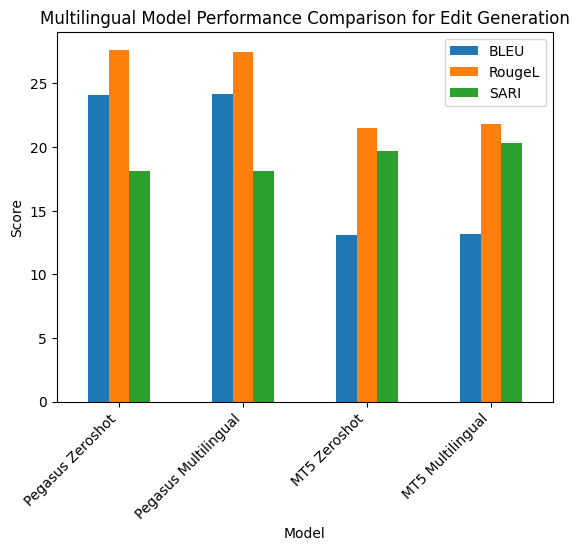

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    'Model': ['Pegasus Zeroshot', 'Pegasus Multilingual', 'MT5 Zeroshot', 'MT5 Multilingual'],
    'BLEU': [24.1, 24.2, 13.1, 13.2],
    'RougeL': [27.67, 27.46, 21.51, 21.83],
    'SARI': [18.08, 18.08, 19.73, 20.33]
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Set the 'Model' column as the index
df = df.set_index('Model')

# Plot the data as a grouped bar chart
ax = df.plot(kind='bar', rot=0)

# Set the chart title and axis labels
ax.set_title('Multilingual Model Performance Comparison for Edit Generation')
ax.set_xlabel('Model')
ax.set_ylabel('Score')

# Slant the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the chart
plt.show()